In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy

Image Size: (1280, 1024, 3)


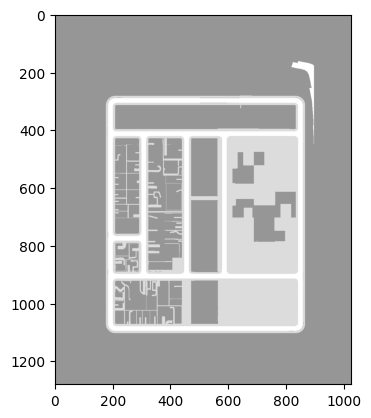

In [4]:
from CarlaBEV.envs.utils import load_map

rgbmap, _, _ = load_map(map_name="Town01", size=128)
print(f"Image Size: {rgbmap.shape}")
plt.imshow(rgbmap)
plt.show()

In [5]:
def draw_scene(points=[]):
    plt.imshow(rgbmap)
    for (x, y) in points:
        plt.scatter(x, y, s=5)
    plt.show()

In [13]:
import matplotlib.pyplot as plt

ROLE_STYLES = {
    "ego":      {"color": "blue",   "linestyle": "-",  "marker": "o"},
    "lead":     {"color": "orange", "linestyle": "--", "marker": "o"},
    "vehicle":  {"color": "red",    "linestyle": "--", "marker": "o"},
    "ped":      {"color": "purple", "linestyle": ":",  "marker": "."},
    "goal":     {"color": "green",  "linestyle": "None", "marker": "X"},
}

def plot_actors(actors, background=None, title="Scenario Debug View"):
    """
    actors: list of dict entries:
        {
          "id": int,
          "role": str ("ego", "lead", "vehicle", "ped", "goal", etc),
          "traj": [(x1,y1), (x2,y2), ...]
        }

    background: Optional (H,W,3) image to plot under trajectories
    """

    plt.figure(figsize=(7,7))

    # Draw background map if provided
    if background is not None:
        plt.imshow(background)
    else:
        plt.gca().invert_yaxis()  # match BEV orientation

    for actor in actors:
        role = actor.get("role", "vehicle")
        traj = actor["traj"]

        style = ROLE_STYLES.get(role, ROLE_STYLES["vehicle"])

        xs, ys = zip(*traj)

        # Draw trajectory line
        plt.plot(
            xs, ys,
            linestyle=style["linestyle"],
            color=style["color"],
            linewidth=1,
            marker=style["marker"],
            markersize=1,
            label=f"{role} (id={actor['id']})"
        )

        # Mark start & end
        plt.scatter(xs[0], ys[0], s=5, color=style["color"], edgecolor="black")
        plt.scatter(xs[-1], ys[-1], s=10, marker="x", color=style["color"])

    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()


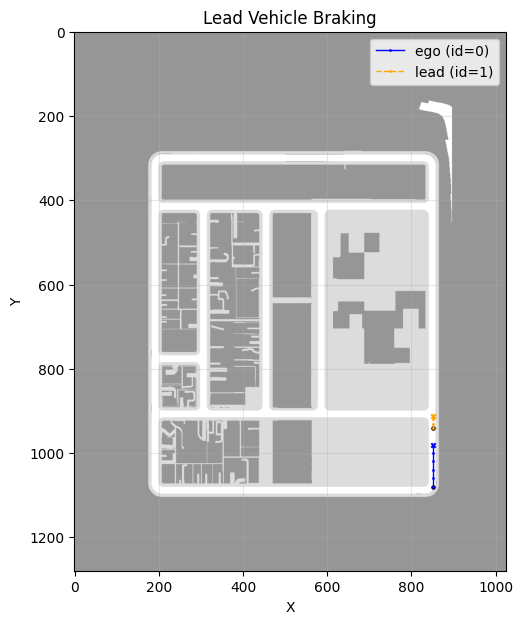

In [14]:
actors = [
    {
        "id": 0,
        "role": "ego",
        "traj": [(850,1080),(850,1060),(850,1040),(850,1020),(850,1000),(850,980)],
    },
    {
        "id": 1,
        "role": "lead",
        "traj": [(850,940),(850,930),(850,920),(850,915),(850,912)],
    }
]

plot_actors(actors, background=rgbmap, title="Lead Vehicle Braking")
